<h1 style = "text-align :center; color:white; background-image:url(https://cdn.pixabay.com/photo/2014/06/16/23/40/blue-370128__340.png)"> About Competition </h1>

<h2 style="border-style: outset;border-color: red;text-align: center;">SIIM-FISABIO-RSNA COVID-19 Dataset Visualization</h2>

<img src="https://content.presspage.com/uploads/2110/gettyimages-1214942330.jpg" height="500" width="500" style="display: block;margin-left: auto;margin-right: auto;"> 

<h2 style="text-align: center;border-style: double;text-align: center;border-color: red; ">About SIIM</h2>
<img src="https://siim.org/resource/resmgr/SIIM_logo-600x315.png" width="200" style="display: block;margin-left: auto;margin-right: auto;">
<p> <b>Society for Imaging Informatics in Medicine</b> (<a href="https://siim.org/">SIIM</a>) is the leading healthcare professional organization for those interested in the current and future use of informatics in medical imaging. The society's mission is to advance medical imaging informatics across the enterprise through education, research, and innovation in a multi-disciplinary community.</p>

<h3 style = "text-align :center; color:red; background-color: yellow; ">This is my first Data Visualization Notebook. Kindly comment is there are any mistakes 🙂</h3>

<a href = "https://www.kaggle.com/shanmukh05/siim-covid19-dataset-256px-jpg" style="font-weight:'bold'; color:blue; font-family:monospace; "><h3>My Dataset</h3></a>

<a href = "https://www.kaggle.com/shanmukh05/siim-covid-19-data-preparation-for-detectron2" style="font-weight:'bold'; color:blue; font-family:monospace; "><h3>My Data Preparation Notebook</h3></a> 

<a href = "https://www.kaggle.com/shanmukh05/siim-covid-19-detection-detectron2-training" style="font-weight:'bold'; color:blue; font-family:monospace; "><h3>My Training Notebook</h3></a> 
To be updated

<a href = "" style="font-weight:'bold'; color:blue; font-family:monospace; "><h3>My Inference Notebook</h3></a> 
Will be created soon.

In [1]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

import tensorflow as tf

import numpy as np
import ast

import pandas as pd
from pandas_profiling import ProfileReport
from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

<h1 style = "text-align :center; color:white; background-image: url(https://cdn.pixabay.com/photo/2014/06/16/23/40/blue-370128__340.png); ">Image Metadata Visualization</h1>

In [2]:
TRAIN_PATH = "../input/siim-covid19-dataset-256px-jpg/train/train"
TEST_PATH = "../input/siim-covid19-dataset-256px-jpg/test/test"

meta_train = pd.read_csv("../input/siim-covid19-dataset-256px-jpg/meta_train.csv")
meta_test = pd.read_csv("../input/siim-covid19-dataset-256px-jpg/meta_test.csv")

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Pandas Profiling of Metadata</h2>

<img src="https://pandas-profiling.github.io/pandas-profiling/docs/assets/logo_header.png" style= "display: block; margin-left: auto; margin-right: auto;" height="300" width="300">

<p>Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince us to use this tool, it also generates interactive reports in web format that can be presented to any person, even if they don’t know programming.</p>
<a style = "text-align :center; font-family:verdana; color:blue; font-size:25px" href = "https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/"> Know more about Pandas Profiling </a>

In [3]:
ProfileReport(meta_train,title = "Metadata of Training images")

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
ProfileReport(meta_test, title="Metadata of Test Images")

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

### - `Height` and `Width` of Test images are Highly Correlated.
### - `Mean width` of both Train and Test images is more than that of `Mean Height`.

#### Comment below if you found any useful observation 😄

<h1 style = "text-align :center; color:white; background-image: url(https://cdn.pixabay.com/photo/2014/06/16/23/40/blue-370128__340.png); ">Tabular Data Visualization</h1>

In [5]:
train_df = pd.read_csv("../input/siim-covid19-dataset-256px-jpg/train.csv")
train_df.head(3)

ImageInstanceUID StudyInstanceUID                label_id  study_label  \
0     000a312787f2     5776db0cec75      Typical Appearance            1   
1     000c3a3f293f     ff0879eb20ed  Negative for Pneumonia            0   
2     0012ff7358bc     9d514ce429a7      Typical Appearance            1   

   height  width                                              boxes  \
0    3488   4256  [{'x': 789.28836, 'y': 582.43035, 'width': 102...   
1    2320   2832        [{'x': 0, 'y': 0, 'width': 1, 'height': 1}]   
2    2544   3056  [{'x': 677.42216, 'y': 197.97662, 'width': 867...   

                                         image_label  
0  opacity 1 789.28836 582.43035 1815.94498 2499....  
1                                     none 1 0 0 1 1  
2  opacity 1 677.42216 197.97662 1545.21983 1197....

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Labels</h2>

Text(0.5, 1.0, 'Labels count')

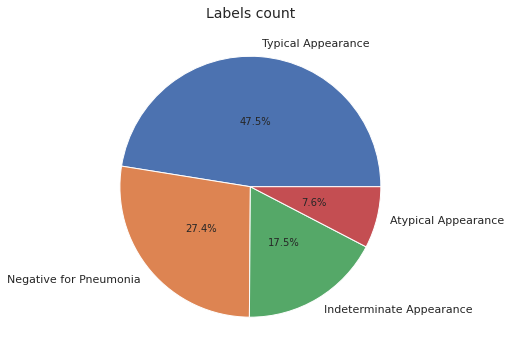

In [6]:
labels = list(train_df.label_id.value_counts().index)
counts = list(train_df.label_id.value_counts().values)

pie, ax = plt.subplots(figsize=[10,6])

plt.pie(x=counts, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Labels count", fontsize=14)

<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

### There are 4 different classes in the data

- `Negative for Pneumonia`
- `Typical Appearance`
- `Indeterminate Appearance`
- `Atypical Appearance`

### Majority of the Training images belongs to `Typical Appearance` class.

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Count of Bounding Boxes</h2>

2    3113
0    2040
1     973
3     183
4      23
8       1
5       1
Name: boxes_count, dtype: int64


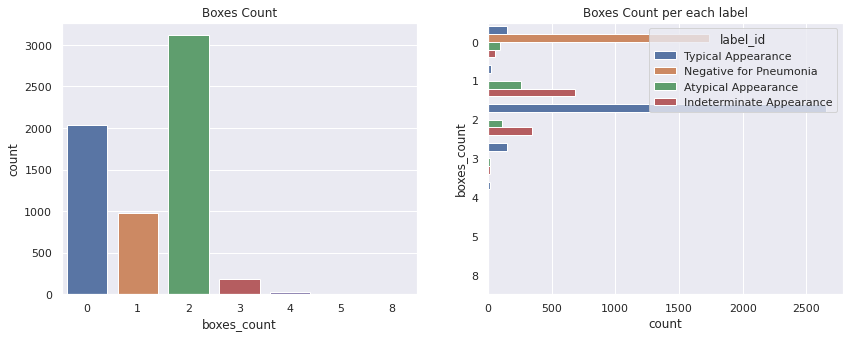

In [7]:
train_df["boxes"] = train_df["boxes"].map(lambda x : ast.literal_eval(x))
train_df["boxes_count"] = train_df["boxes"].map(lambda x : len(x))
train_df["boxes_count"][train_df["image_label"] ==  "none 1 0 0 1 1"]  = 0

labels = list(train_df.boxes_count.value_counts().index)
counts = list(train_df.boxes_count.value_counts().values)

print(train_df.boxes_count.value_counts())

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x="boxes_count",data=train_df)
plt.title("Boxes Count")

plt.subplot(1,2,2)
sns.countplot(y="boxes_count",hue="label_id",data=train_df)
plt.title("Boxes Count per each label")

plt.show()

<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

- Number of boxes per given image are **not continuous**.
- The discrete counts are `[1,2,3,4,5,8]`
- Majority of images containes either 0 or 2 (either no bounding-box or 2)

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Size of Bounding Boxes</h2>

In [8]:
height = []
width = []
x = []
y = []
for row in train_df.values:
    for box in row[6]:
        if box["width"] != 1:
            width.append(box["width"])
            x.append(box["x"])
            y.append(box["y"])
            height.append(box["height"])

<Figure size 720x720 with 0 Axes>

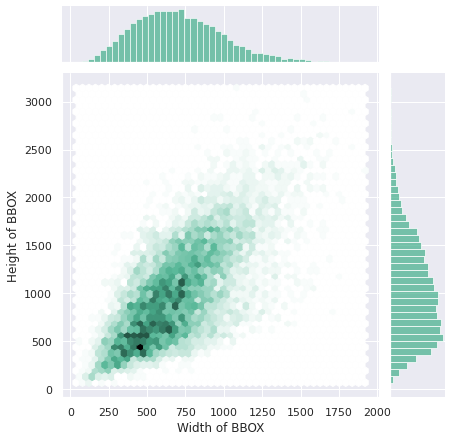

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x=width, y=height, kind="hex", color="#4CB391")
plt.xlabel("Width of BBOX")
plt.ylabel("Height of BBOX")

plt.show()

<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

- Height of boxes peaks around `750px` and distributes evenly both sides.
- Width of boxes peaks around `500px` and distribution is slightly shifted towards higher widths.

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Location of Bounding Boxes</h2>

<Figure size 720x720 with 0 Axes>

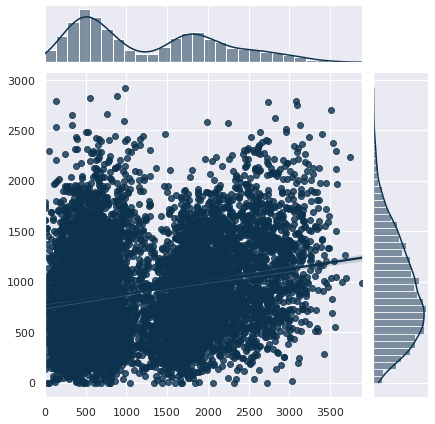

In [10]:
plt.figure(figsize=(10,10))

sns.jointplot(x=x, y=y, kind="reg", color="#0d324d")
plt.xlabel("X-location of BBOX")
plt.ylabel("Y-location of BBOX")

plt.show()

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">X,Width of Bounding Boxes</h2>

<Figure size 720x720 with 0 Axes>

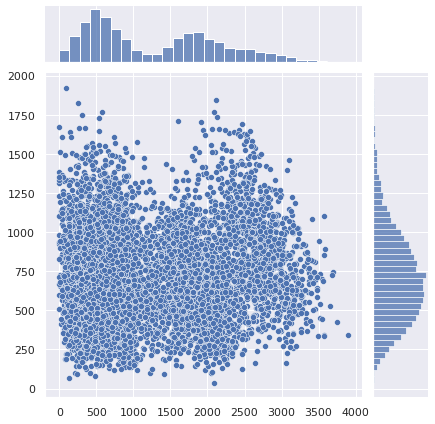

In [11]:
plt.figure(figsize=(10,10))

sns.jointplot(x=x, y=width, kind="scatter")

plt.show()

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Y,Height of Bounding Boxes</h2>

<Figure size 720x720 with 0 Axes>

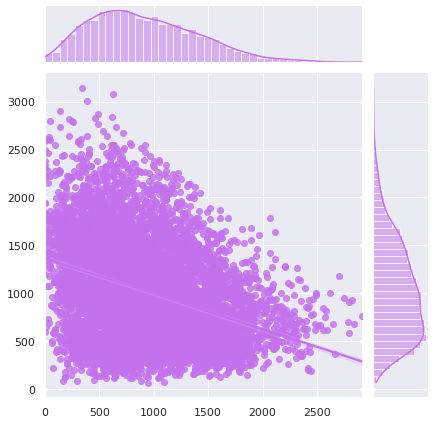

In [12]:
plt.figure(figsize=(10,10))

sns.jointplot(x=y, y=height, kind="reg", color="#c471ed")

plt.show()

<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

- Y coordinate of top-left point of BBOX peaks around `500px`.
- X coordinate of top-left point of BBOX has 2 peaks at `500px`, `2000px` 

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Study Instance UID</h2>

Counter({1: 5822, 2: 207, 3: 15, 4: 4, 5: 3, 9: 1, 7: 1, 6: 1})


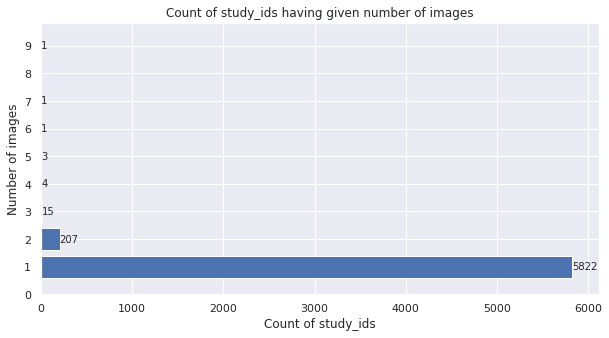

In [13]:
labels = list(train_df.StudyInstanceUID.value_counts().index)
counts = train_df.StudyInstanceUID.value_counts().values

keys = list(Counter(counts).keys())
values = list(Counter(counts).values())

print(Counter(counts))

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(keys,values,align = "center")
ax.set_xlabel("Count of study_ids")
ax.set_ylabel("Number of images")
y_tick = np.arange(10)
ax.set_yticks(y_tick)
ax.set_title("Count of study_ids having given number of images")

for i, y in enumerate(ax.patches):
    ax.text(y.get_width()+.09, y.get_y()+.3, str(round((y.get_width()), 1)), fontsize=10)

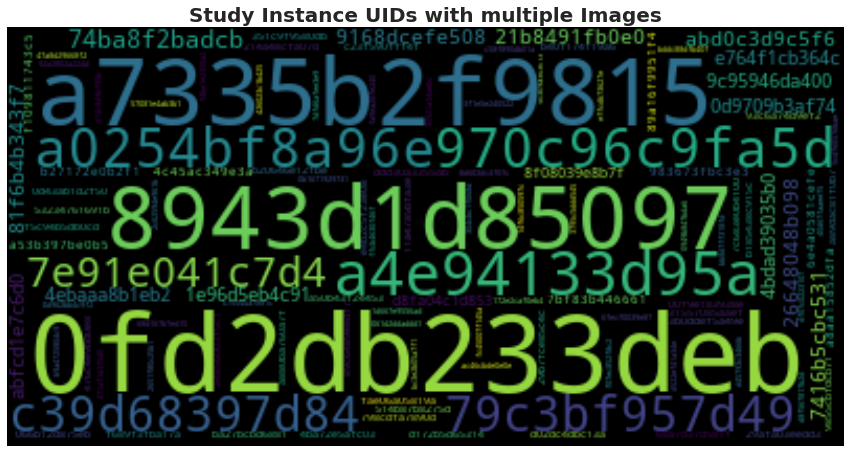

In [14]:
labels = labels[:232]
counts = counts[:232]

dict_ = {labels[i]:counts[i] for i in range(len(labels))}
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(dict_)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Study Instance UIDs with multiple Images",fontsize=20,fontweight="bold")
plt.show()

<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

- Majority of `Study Instance UID` containes only 1 image.
- There are `Study Instance UID` with multiple images.
- These count of images are discrete and are in the list `[1,2,3,4,5,6,7,9]`

<h1 style = "text-align :center; color:white; background-image: url(https://cdn.pixabay.com/photo/2014/06/16/23/40/blue-370128__340.png); ">Images Visualization</h1>

In [15]:
colors_dict = {
    0 : (255,255,255),
    1 : (0,0,255),
    2 : (0,255,0),
    3 : (255,0,0)
}

TRAIN_FILES = tf.io.gfile.glob(TRAIN_PATH + "/*.jpg")

##------------------------------
#get path of image from study_id
##------------------------------
def get_path(image_id):
    filepath = tf.io.gfile.glob(TRAIN_PATH + "/*" + image_id+".jpg")[0]
    return filepath

##-----------------------
#display images with BBOX
##-----------------------
def showImages(df,label):
    df = df[df["label_id"] == label]
    fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
    for i,row in enumerate(df.values[:9]):
        r,c = i//3, i%3
        filepath = get_path(row[0])
        img = cv2.imread(filepath,cv2.COLOR_BGR2RGB)
        study_label = row[3]
        box_color = colors_dict[study_label]
        w_factor, h_factor = 256.0/row[5], 256.0/row[4]
        if label != "Negative for Pneumonia":
            for box in row[6]:
                x1 = int(box["x"]*w_factor)
                y1 = int(box["y"]*h_factor)
                x2 = x1 + int(box["width"]*w_factor)
                y2 = y1 + int(box["height"]*h_factor)
                
                cv2.rectangle(img, (x1,y1), (x2,y2),box_color,2)
        ax[r,c].imshow(img,cmap="viridis")
        ax[r,c].axis("off")
        ax[r,c].set_title(label,fontsize=15, weight='bold')

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Class: Negative for Pneumonia</h2>

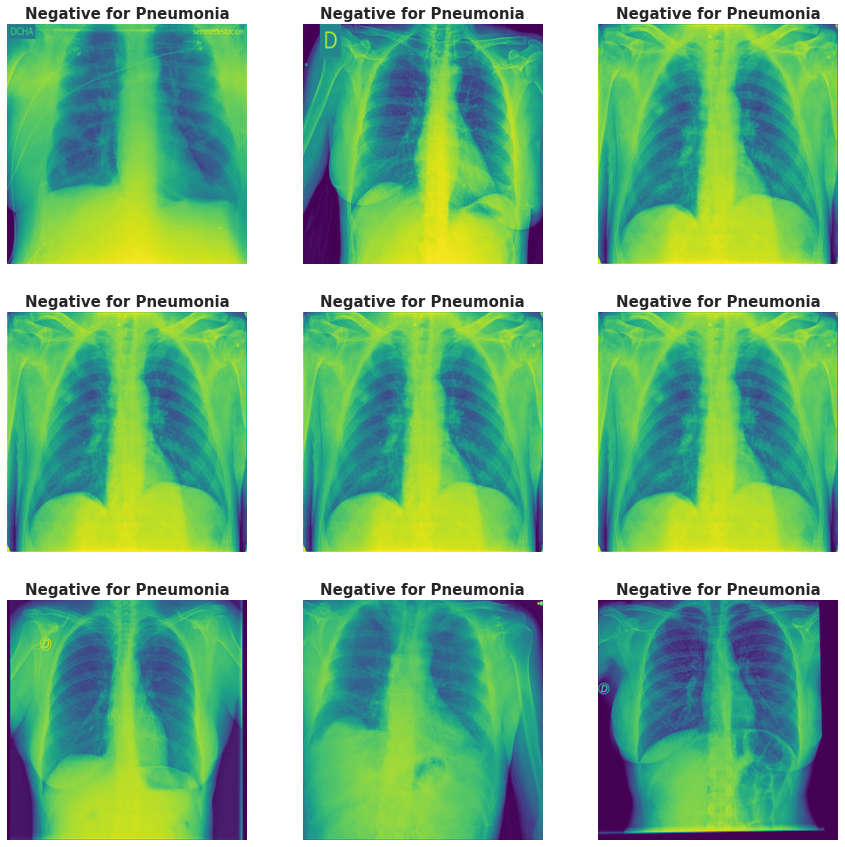

In [16]:
showImages(train_df,"Negative for Pneumonia")

In [17]:
temp = train_df[train_df["label_id"] == "Negative for Pneumonia"]
print("Unique Values : ",temp.boxes.value_counts())
print("Number of unique values : ", len(temp.boxes.value_counts()))

Unique Values :  [{'x': 0, 'y': 0, 'width': 1, 'height': 1}]    1736
Name: boxes, dtype: int64
Number of unique values :  1


<h2 style = "text-align :center; font-family:verdana; color:red; background-image: url(https://hookagency.com/wp-content/uploads/2015/11/miracle-grow-light-green-gradient.jpg); ">Observations</h2>

- So, as per the label `Negative for Pneumonia` there are no images with bounding boxes which is correct 🥳.

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Class: Typical Appearance</h2>

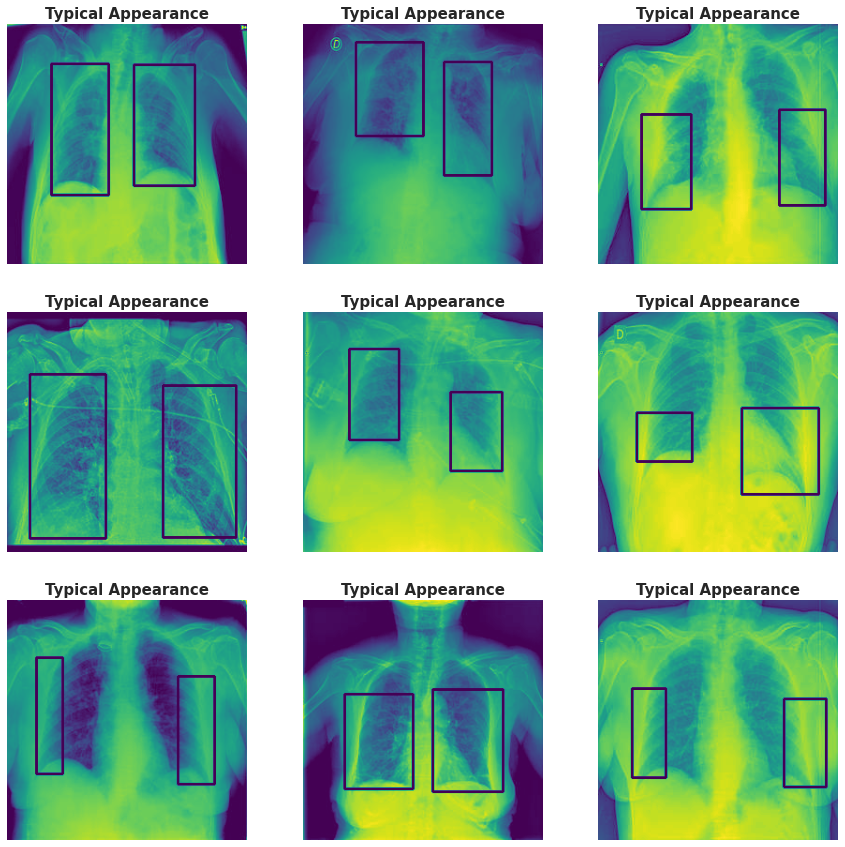

In [18]:
showImages(train_df,"Typical Appearance")

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Class: Atypical Appearance</h2>

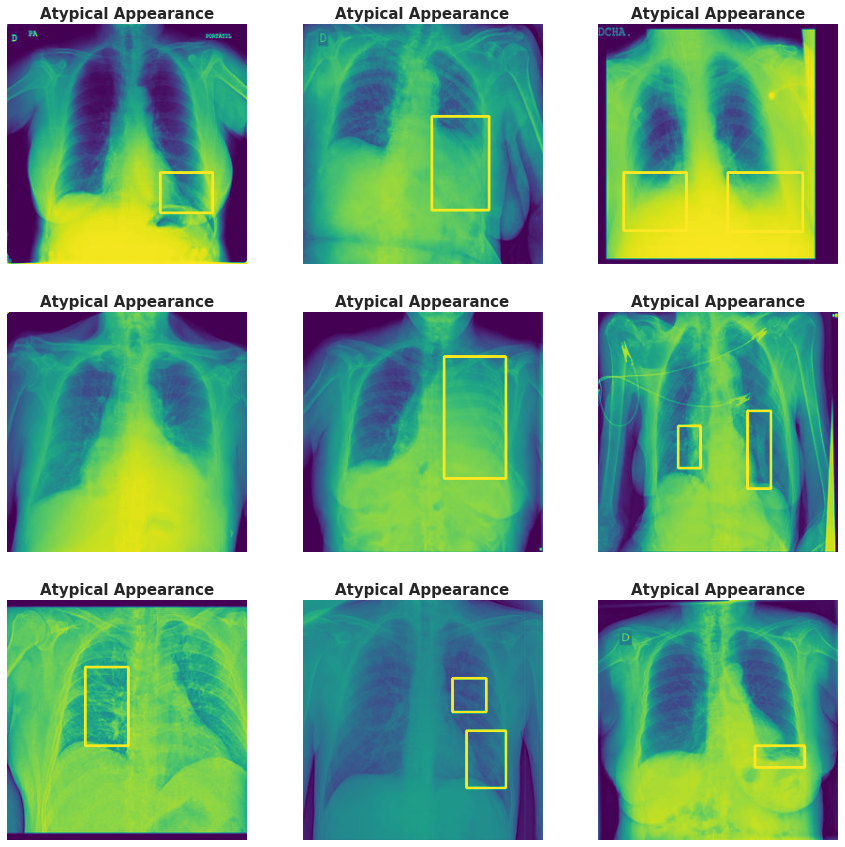

In [19]:
showImages(train_df,"Atypical Appearance")

<h2 style = "text-align :center; font-family:verdana; color:black; background-image: url(https://i.pinimg.com/originals/dd/f9/97/ddf997d65d8b92a3d7e085d6bf1cc484.jpg); ">Class: Indeterminate Appearance </h2>

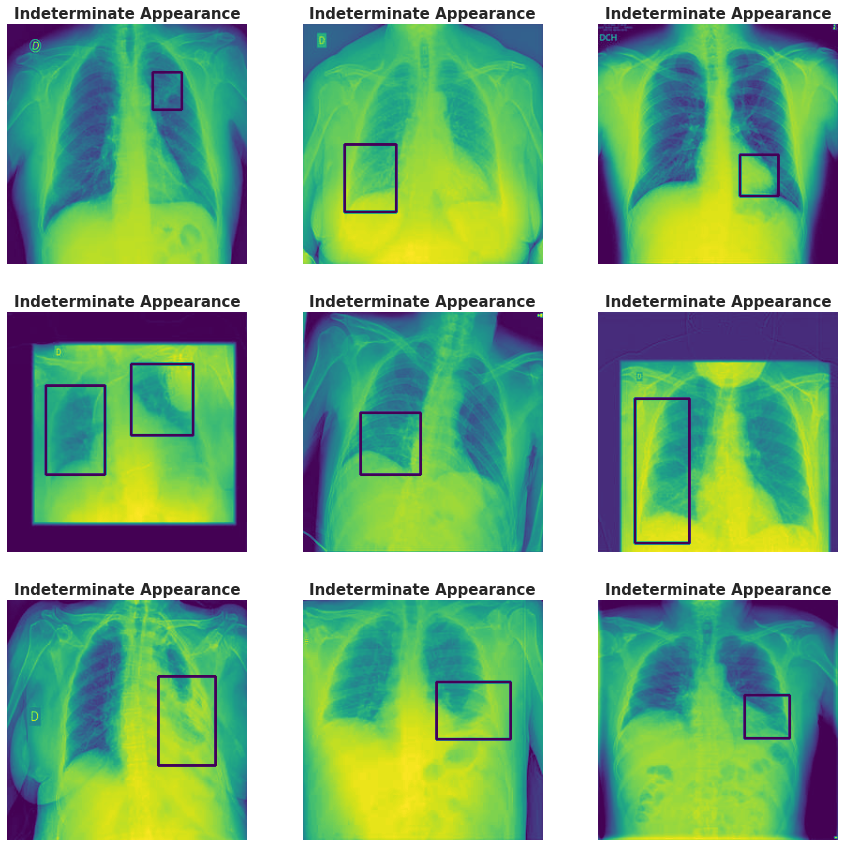

In [20]:
showImages(train_df,"Indeterminate Appearance")

<img src="https://t4.ftcdn.net/jpg/03/54/26/09/360_F_354260981_mvf4Yt39tO1iAWkXeFcPayv0OkTw6p4j.jpg" style= "display: block;margin-left: auto; margin-right: auto;" height="100" width="300">

<h1 style = "text-align :center; color:white; background-image: url(https://cdn.pixabay.com/photo/2014/06/16/23/40/blue-370128__340.png); ">Do upvote if you found this notebook useful🙂</h1>